<a href="https://colab.research.google.com/github/Mela13076/wordEmbedding/blob/main/wordEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📝 Project Description:
This project implements a Word2Vec-based word embedding system using Python and Gensim. The purpose is to train a word embedding model on a collection of Star Wars story introductions to capture the semantic meaning of words based on their context.

Using the Word2Vec algorithm (either CBOW or Skip-Gram), the model will learn vector representations of words. After training, the program will calculate the cosine similarity between 10 selected pairs of words that appear in the text. These similarity scores will help identify which word pairs are most contextually related according to the trained model.

# 🎯 Objective

1.   Process natural language text (Star Wars intros).
2.   Train a Word2Vec model on this text.
3.   Choose 10 meaningful word pairs from the text.
4.   Calculate cosine similarity between the word embeddings for each pair.
5.   Determine and report the pair with the highest similarity.

In [ ]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models import Word2Vec
from pathlib import Path

# Download the punkt tokenizer data
nltk.download('punkt')
# Download the stopwords corpus
nltk.download('stopwords')
nltk.download('punkt_tab')

In [ ]:
debug = True

In [ ]:
# # Step 1: Load the text data

# with open('starWarsEp4Script.txt', 'r') as file:
#     raw_text = file.read()


#function to compbine all txt files in the textFiles folder.
def load_all_texts(folder_path):
    folder = Path(folder_path)
    all_text = "\n".join(file.read_text(encoding='utf-8') for file in folder.glob("*.txt"))
    return all_text

raw_text = load_all_texts("textFiles")


In [ ]:
# Step 2: Preprocess the text
"""
Prepares raw text for Word2Vec training: splits into sentences, tokenizes words,lowercases,
and removes stopwords/non-alphabetic tokens. Returns cleaned tokenized sentences (list of lists).
sent_tokenize() - converts the text into a list of sentences
word_tokenize() - converts the text into a list of words and punctuation.
"""
def preprocess_text(text, debug=False):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    if debug: print(f'Sentences: {sentences}')

    # Tokenize each sentence into words
    words = [word_tokenize(sentence) for sentence in sentences]
    if debug: print(f'Words: {words}')

    # Convert all words to lowercase
    words = [[word.lower() for word in sentence] for sentence in words]
    if debug: print(f'Lowercased: {words}')

    # Remove stopwords and non-alphabetic tokens
    """
    Stopwords are frequently occurring words in a language that are frequently omitted from natural
    language processing (NLP) tasks due to their low significance for deciphering textual meaning.
    """
    stop_words = set(stopwords.words('english'))
    if debug: print(f'Stop Words: {stop_words}')

    cleaned_words = [[word for word in sentence if word.isalpha() and word not in stop_words] for sentence in words]
    if debug: print(f'Words processed: {cleaned_words}')

    return cleaned_words



In [ ]:
# Step 3: Train the Word2Vec model using Gensim
"""
Train a Word2Vec model using the cleaned and tokenized sentences from the preprocessing step. The goal
is to learn a vector representation (embedding)for each word in the vocabulary based on the surrounding context it appears in.

I will use Skip-Gram architecture (sg=1), which predicts surrounding context words given a center word.
Skip-Gram is chosen because it performs better on smaller datasets and is more effective at learning representations
for infrequent or rare words — which is important since the Star Wars intros are a limited corpus with specialized vocabulary.
"""
# output from your preprocess_text() function
cleaned_words = preprocess_text(raw_text)
# - Build and train the model with parameters like vector_size, window, min_count, and sg (for CBOW or Skip-Gram)
model = Word2Vec(
                  sentences=cleaned_words,  #preprocessed text
                  vector_size=100,          # dimension of word vectors
                  window=5,                 # context window size
                  min_count=1,              # ignore words with total frequency lower than this
                  sg=1                      # use Skip-Gram model (sg=1), not CBOW (sg=0)
                )


In [ ]:
# Step 4: Pick 10 word pairs
word_pairs = [
    ("jedi", "force"),         # closely related in meaning and story
    ("empire", "rebellion"),   # opposing political forces
    ("vader", "sith"),         # character and affiliation
    ("skywalker", "anakin"),   # identity connection
    ("yoda", "wisdom"),        # symbolic relationship
    ("saber", "weapon"),       # object classification
    ("dark", "light"),         # symbolic opposites
    ("clone", "stormtrooper"), # related military roles
    ("death", "destruction"),  # thematic connection
    ("hope", "freedom")        # symbolic Star Wars values
]



Similarity between 'jedi' and 'force': 0.9881
Similarity between 'empire' and 'rebellion': 0.9960
Similarity between 'anakin' and 'sith': 0.9953
Similarity between 'skywalker' and 'anakin': 0.9931
Similarity between 'yoda' and 'wisdom': 0.9516
Similarity between 'saber' and 'weapon': 0.9945
Similarity between 'dark' and 'light': 0.9738
Similarity between 'clone' and 'stormtrooper': 0.9974
Similarity between 'death' and 'destruction': 0.7766
Similarity between 'hope' and 'freedom': 0.9963


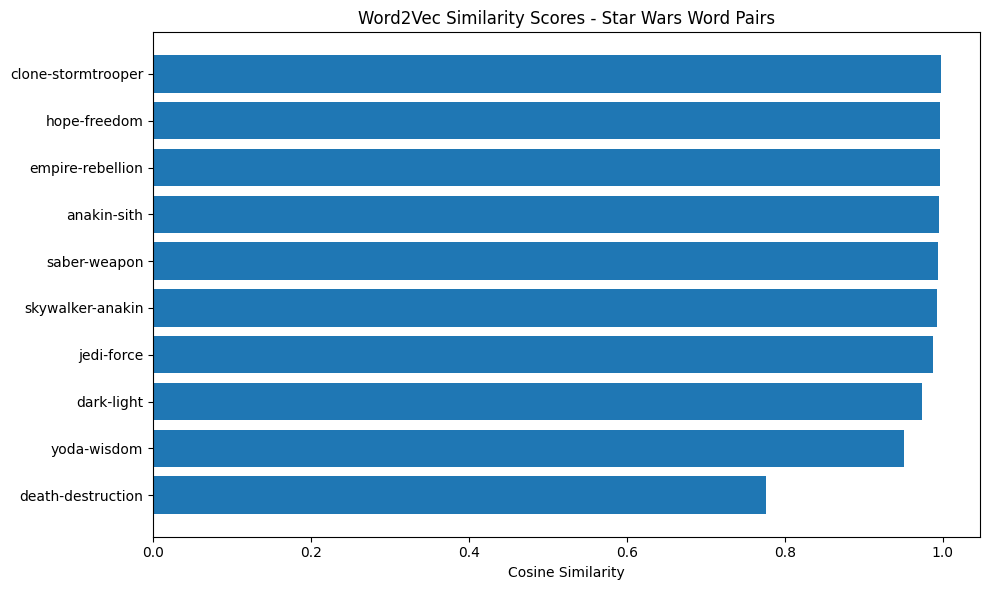

In [ ]:
# Step 5: Compute cosine similarity
import matplotlib.pyplot as plt

def compare_word_pairs_and_plot(model, word_pairs):
    similarities = [] #list of all the similarites with word pair

    #finding similarites
    #For each word pair, calculate similarity using model.wv.similarity(word1, word2)
    for w1, w2 in word_pairs:
        if w1 in model.wv and w2 in model.wv:
            sim = model.wv.similarity(w1, w2)
            similarities.append(((w1, w2), sim))
            #Store the pair and similarity score in a list
            print(f"Similarity between '{w1}' and '{w2}': {sim:.4f}")
        else:
            print(f"Missing word(s): '{w1}' or '{w2}'")

    if not similarities:
        print("No valid word pairs found to plot.")
        return

    # Sort by similarity for better plotting
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Unpack data
    labels = [f"{w1}-{w2}" for (w1, w2), _ in similarities]
    scores = [sim for _, sim in similarities]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(labels, scores)
    plt.xlabel("Cosine Similarity")
    plt.title("Word2Vec Similarity Scores - Star Wars Word Pairs")
    plt.gca().invert_yaxis()  # Most similar on top
    plt.tight_layout()
    plt.show()


compare_word_pairs_and_plot(model, word_pairs)


In [ ]:
# Step 6: Analyze and output results

# 1. View the learned vocabulary
print("Vocabulary preview (word:index):")
print(dict(list(model.wv.key_to_index.items())[:10]))  # Show first 10 words
print(f"\nTotal vocabulary size: {len(model.wv.key_to_index)}\n")

# 2. View the vector representation for a specific word
word = 'force'
if word in model.wv:
    print(f"Vector representation for '{word}':")
    print(model.wv[word], "\n")
else:
    print(f"'{word}' not found in the vocabulary.\n")

# 3. Check cosine similarity between two known words
word1, word2 = 'jedi', 'force'
if word1 in model.wv and word2 in model.wv:
    similarity = model.wv.similarity(word1, word2)
    print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.4f}\n")
else:
    print(f"One or both words not found in vocabulary: '{word1}', '{word2}'\n")

# 4. Get the top 10 most similar words to a specific word
target_word = 'sith'
if target_word in model.wv:
    print(f"Top 10 most similar words to '{target_word}':")
    for similar_word, score in model.wv.most_similar(target_word):
        print(f"{similar_word}: {score:.4f}")
else:
    print(f"'{target_word}' not found in the vocabulary.")


Vocabulary preview (word:index):
{'luke': 0, 'han': 1, 'leia': 2, 'threepio': 3, 'vader': 4, 'star': 5, 'int': 6, 'artoo': 7, 'death': 8, 'cockpit': 9}

Total vocabulary size: 6583

Vector representation for 'force':
[-0.19407496  0.08151609 -0.12498106  0.02914918  0.2111453  -0.17071201
  0.0415367   0.23596078 -0.18548526 -0.17950276 -0.30239075 -0.34963068
 -0.0317341   0.06319144  0.2696981  -0.34127074 -0.12975138 -0.21357216
  0.18035135 -0.35802898  0.26341856 -0.01216239  0.23578523 -0.08594847
 -0.02389245  0.10017709  0.10923186  0.08149633 -0.25872403 -0.08261783
  0.13767825  0.10556961  0.04861555 -0.03880791 -0.00177851  0.06966107
  0.12686631 -0.10253563 -0.30776438 -0.3422015  -0.21144706 -0.32882193
 -0.31300077  0.06142053  0.05716191 -0.12644292 -0.1013636   0.08407325
  0.01209309  0.12855795  0.06641888 -0.29280776 -0.10885035 -0.05532084
  0.03583272  0.06982785  0.00973028 -0.10643607 -0.3691229   0.09203
 -0.09292611  0.01699519 -0.19338602  0.35003433 -0.1591